CustomerId              int64
Surname                object
CreditScore             int64
Nationality            object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited or Retained      int64
dtype: object
Average Salary of Exited or Retained Customers is: 100090.2398809998
(2500,)
[[-0.73550706  0.00886037 -1.64080994  0.01526571]
 [ 1.02442719  0.00886037 -0.07927152 -0.65260917]
 [ 0.80829492  1.39329338 -0.99684012 -0.46178778]
 [ 0.39661439  0.00886037 -1.5917461  -0.08014499]
 [-0.46791471  0.70107688  1.28330241  1.25560478]
 [ 0.1701901   1.39329338 -0.56412649 -0.17555568]
 [ 0.23194218 -1.72168089 -0.25108055  2.49594384]
 [ 0.75683485  0.00886037  0.60389326 -0.74801987]
 [ 0.82887894  1.73940163  1.23787541 -0.08014499]
 [-1.71324831  0.00886037  1.30541951  0.01526571]]
Confusio

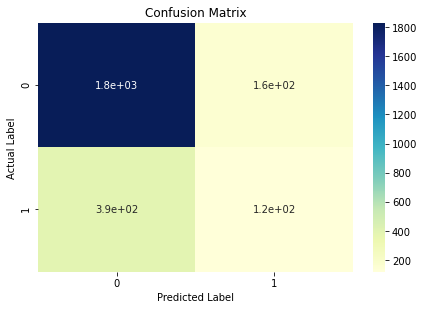

Accuracy is: 0.78
Precision is: 0.42704626334519574
Recall is: 0.2357563850687623
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1991
           1       0.43      0.24      0.30       509

    accuracy                           0.78      2500
   macro avg       0.63      0.58      0.59      2500
weighted avg       0.74      0.78      0.75      2500



In [2]:
# -*- coding: utf-8 -*-
"""

@author: Roelof
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv("Churn_Modelling.csv")

                                        #Data Wrangling
df=df1.dropna()
df.rename(columns={"Geography":"Nationality","Exited":"Exited or Retained"},inplace=True)
df.drop(columns="RowNumber",inplace=True)

#Datatype of features
datatypes=df.dtypes
print(datatypes)

#Number of nationalities with the bank
nationality_count=df["Nationality"].value_counts()

#Average Salary of all Customers - exited or retained
Average_salary=df["EstimatedSalary"].mean()
print("Average Salary of Exited or Retained Customers is:", Average_salary)

#Number of Active Customers that have closed acccount(1) or retained(0)
active_customers_exit_retain=df.groupby("Exited or Retained")["IsActiveMember"].count()

#Number of Customers that have closed account(1) or retained(0)
Num_customer_churn=df.groupby("Exited or Retained")["CustomerId"].count()

#Mean Salary of customers that have closed account(1) or retained (0)
Mean_salary_by_churn=df.groupby("Exited or Retained")["EstimatedSalary"].mean()

#Find top 500 Customers with highest estimated salaries
Top_salary=df.nlargest(500,"EstimatedSalary",keep="first")

#Select rows where Credit Score >= 800
Excellent_credit=df[(df["CreditScore"]>=800)]

#Look at Specific Customer data
Customer1=df.loc[df["Surname"]=="Belbin"]

#Look at customers with last name "Gordan" and filter out specific data
Customer2=df.loc[df["Surname"]=="Gordon",["CustomerId","EstimatedSalary","Nationality","Exited or Retained"]]

#Look at Number of retained customers with filtered out data
Churn_retain=df.loc[df["Exited or Retained"]==0,["Tenure","EstimatedSalary","CreditScore","Age"]]


                        # Machine Learning - Classification(KNN)
                                # Predict Churn Analysis 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X=df[["CreditScore","Tenure","EstimatedSalary","Age"]]
y=df["Exited or Retained"]



#Split the Dataset - Train/Test/Split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=0)
Num_test_samples=y_test.shape
print(Num_test_samples)

#Feature Scaling because feature values have very different ranges
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
print(X_train[0:10,:])  # See the feature values scaled


#Train the model/Predictions of testing set - K Nearest Neighbor
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
ypred=classifier.predict(X_test)

#Test Performance of model (Confusion Matrix)
from sklearn.metrics import confusion_matrix
cmk=confusion_matrix(y_test,ypred)
print("Confusion Matrix array object is:", cmk)

#Plot confusion matrix - seaborn
sns.heatmap(cmk, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.title("Confusion Matrix",fontsize=12)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#Accuracy Score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
print("Accuracy is:", accuracy_score(y_test, ypred))
print("Precision is:", precision_score(y_test, ypred))
print("Recall is:", recall_score(y_test,ypred)) 
print(classification_report(y_test,ypred))
